# Declare and read data

In [3]:
import chardet

with open('train.csv', 'rb') as f:
    train=chardet.detect(f.read(10000))
    print(train)
with open('test.csv', 'rb') as f:
    test=chardet.detect(f.read(10000))
    print(test)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [11]:
import pandas as pd
train = pd.read_csv('train.csv', encoding='ascii', sep=';')
test = pd.read_csv('test.csv', encoding='ascii', sep=';')

# EDA

# Basic EDA

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def dataoverview(df, message):
    print(f'{message}:')
    print('\nInfo: ')
    print(df.info())
    print('\nDescribe: ')
    print(df.describe())
    print('\nRows: ', df.shape[0])
    print('\nNumber of features: ', df.shape[1])
    print('\nFeatures: ')
    print(df.columns.tolist())
    print('\nMissing values: ', df.isnull().sum().values.sum())
    print('\nUnique values: ')
    print(df.nunique())
    dups = df.duplicated()
    print("Duplicate Rows",df[dups])
    plt.figure(figsize=(10,12))
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

A Overview about the train dataset:

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Describe: 
                age        balance    

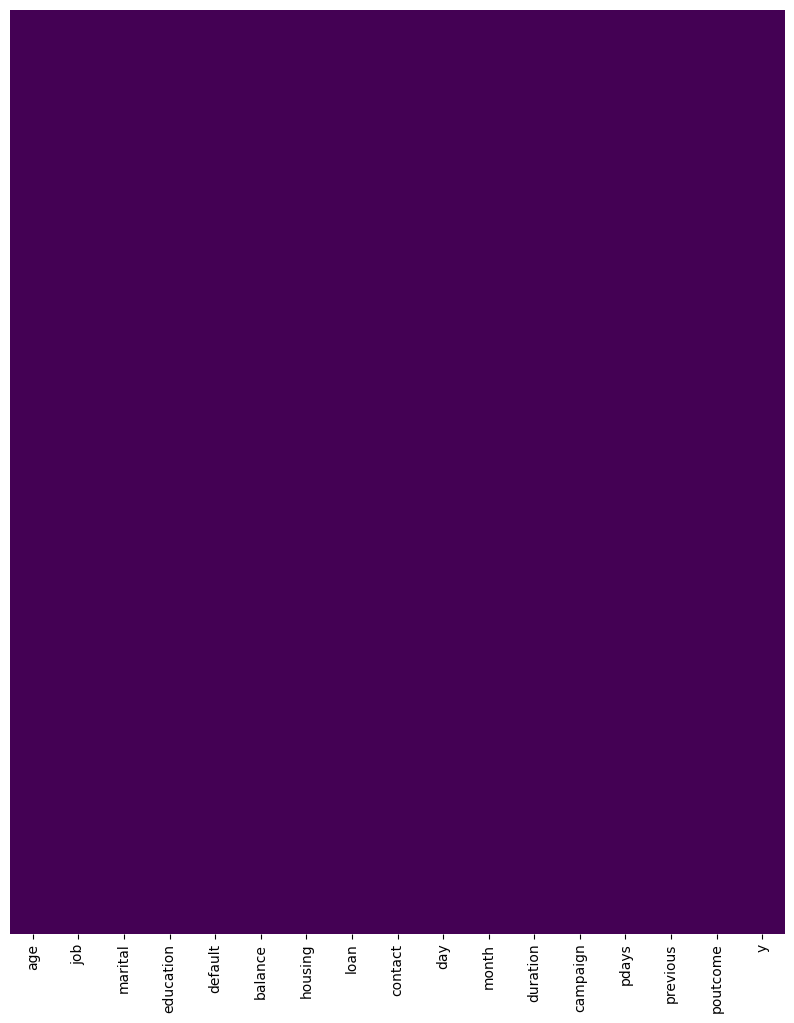

In [19]:
dataoverview(train, 'A Overview about the train dataset')

A Overview about the test dataset:

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None

Describe: 
               age       balance       

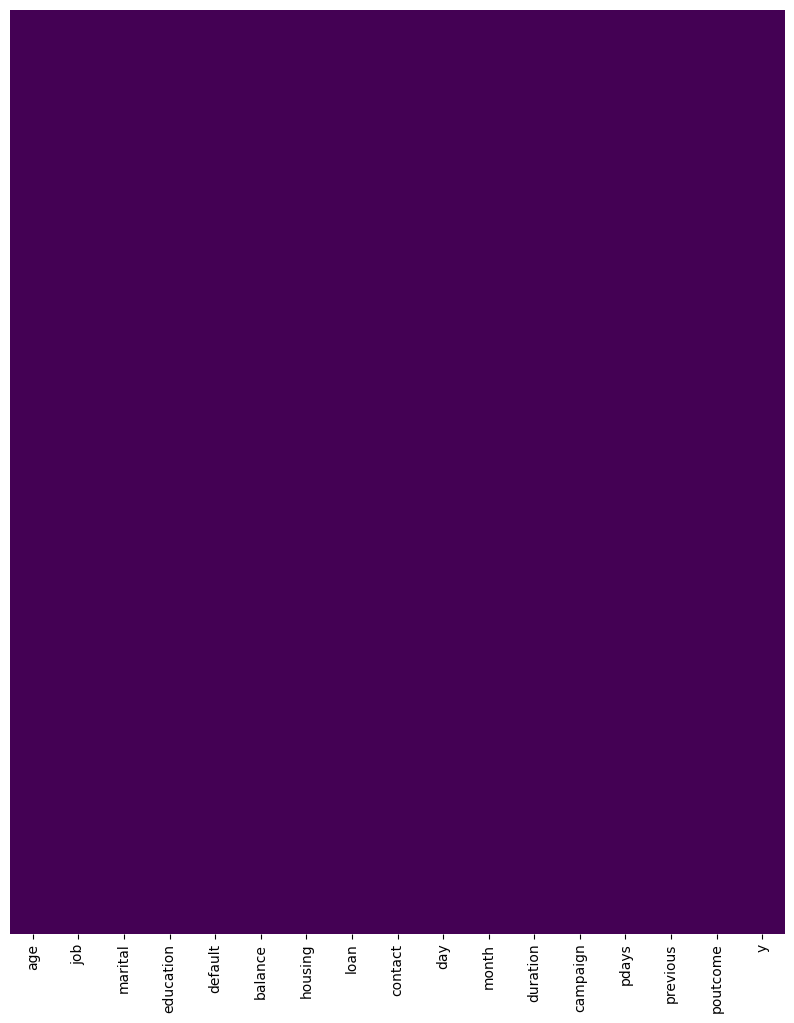

In [22]:
dataoverview(test, 'A Overview about the test dataset')

# Save data

In [29]:
train.to_csv('train_cleaned.csv', index=False)
test.to_csv('test_cleaned.csv', index=False)

## Plot charts to understand the data

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
def eda_dataset(df):
    #Separating columns to be visualized
    out_cols=list(set(df.nunique()[df.nunique()<6].keys().tolist()
                      + df.select_dtypes(include='object').columns.tolist()))
    viz_cols=[x for x in df.columns if x not in out_cols]
    sns.pairplot(df[viz_cols], diag_kind='kde')
    plt.show()

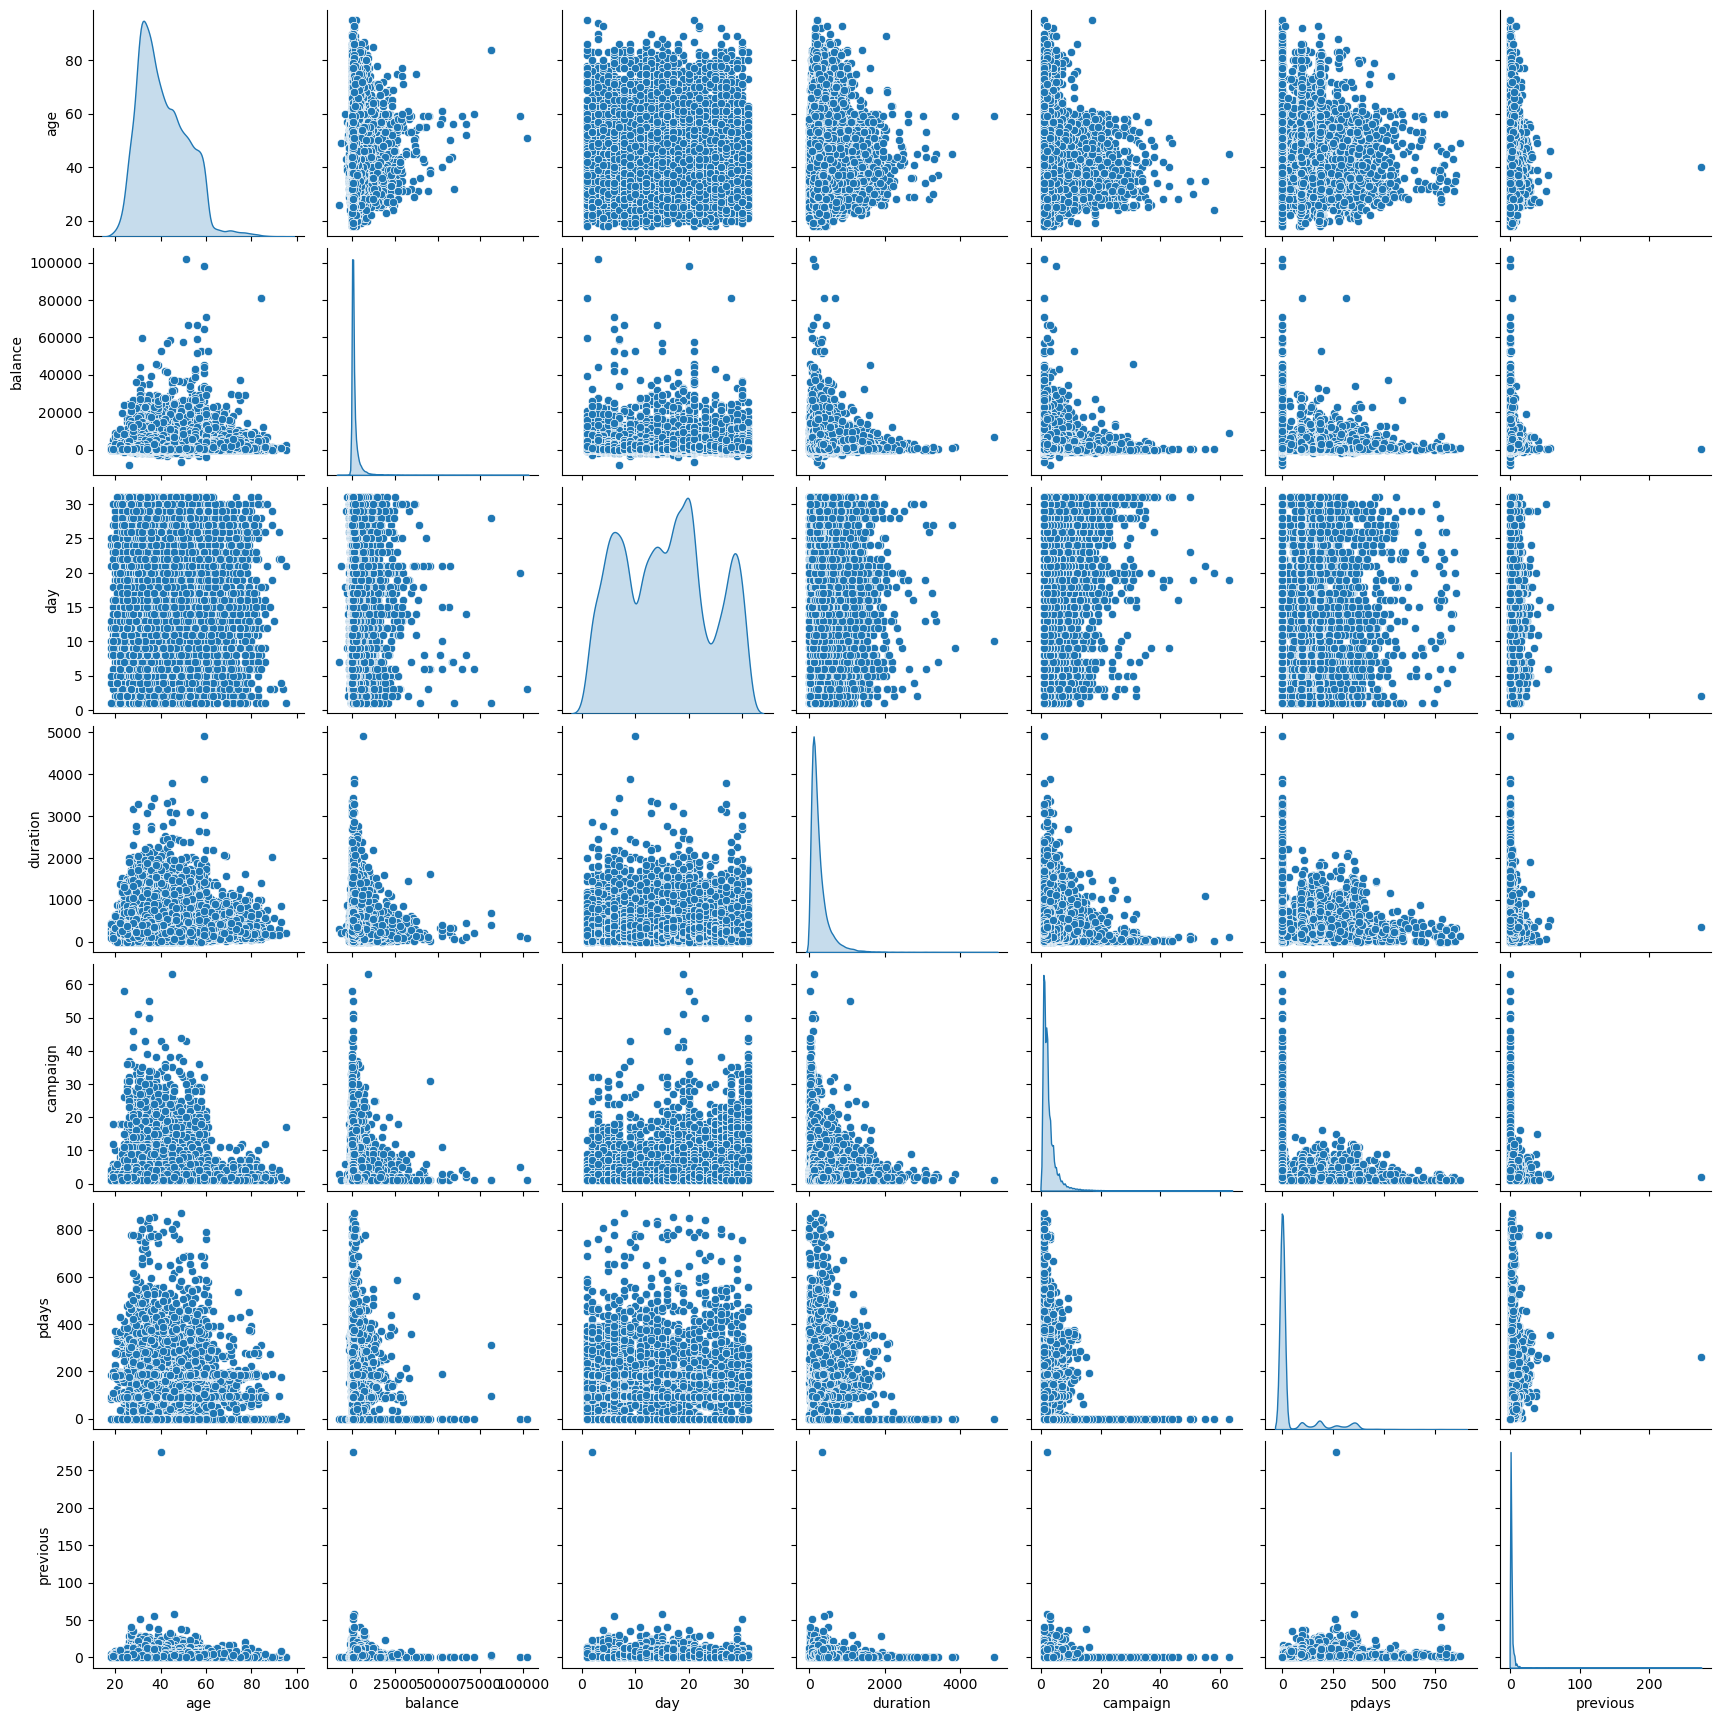

In [37]:
eda_dataset(train)

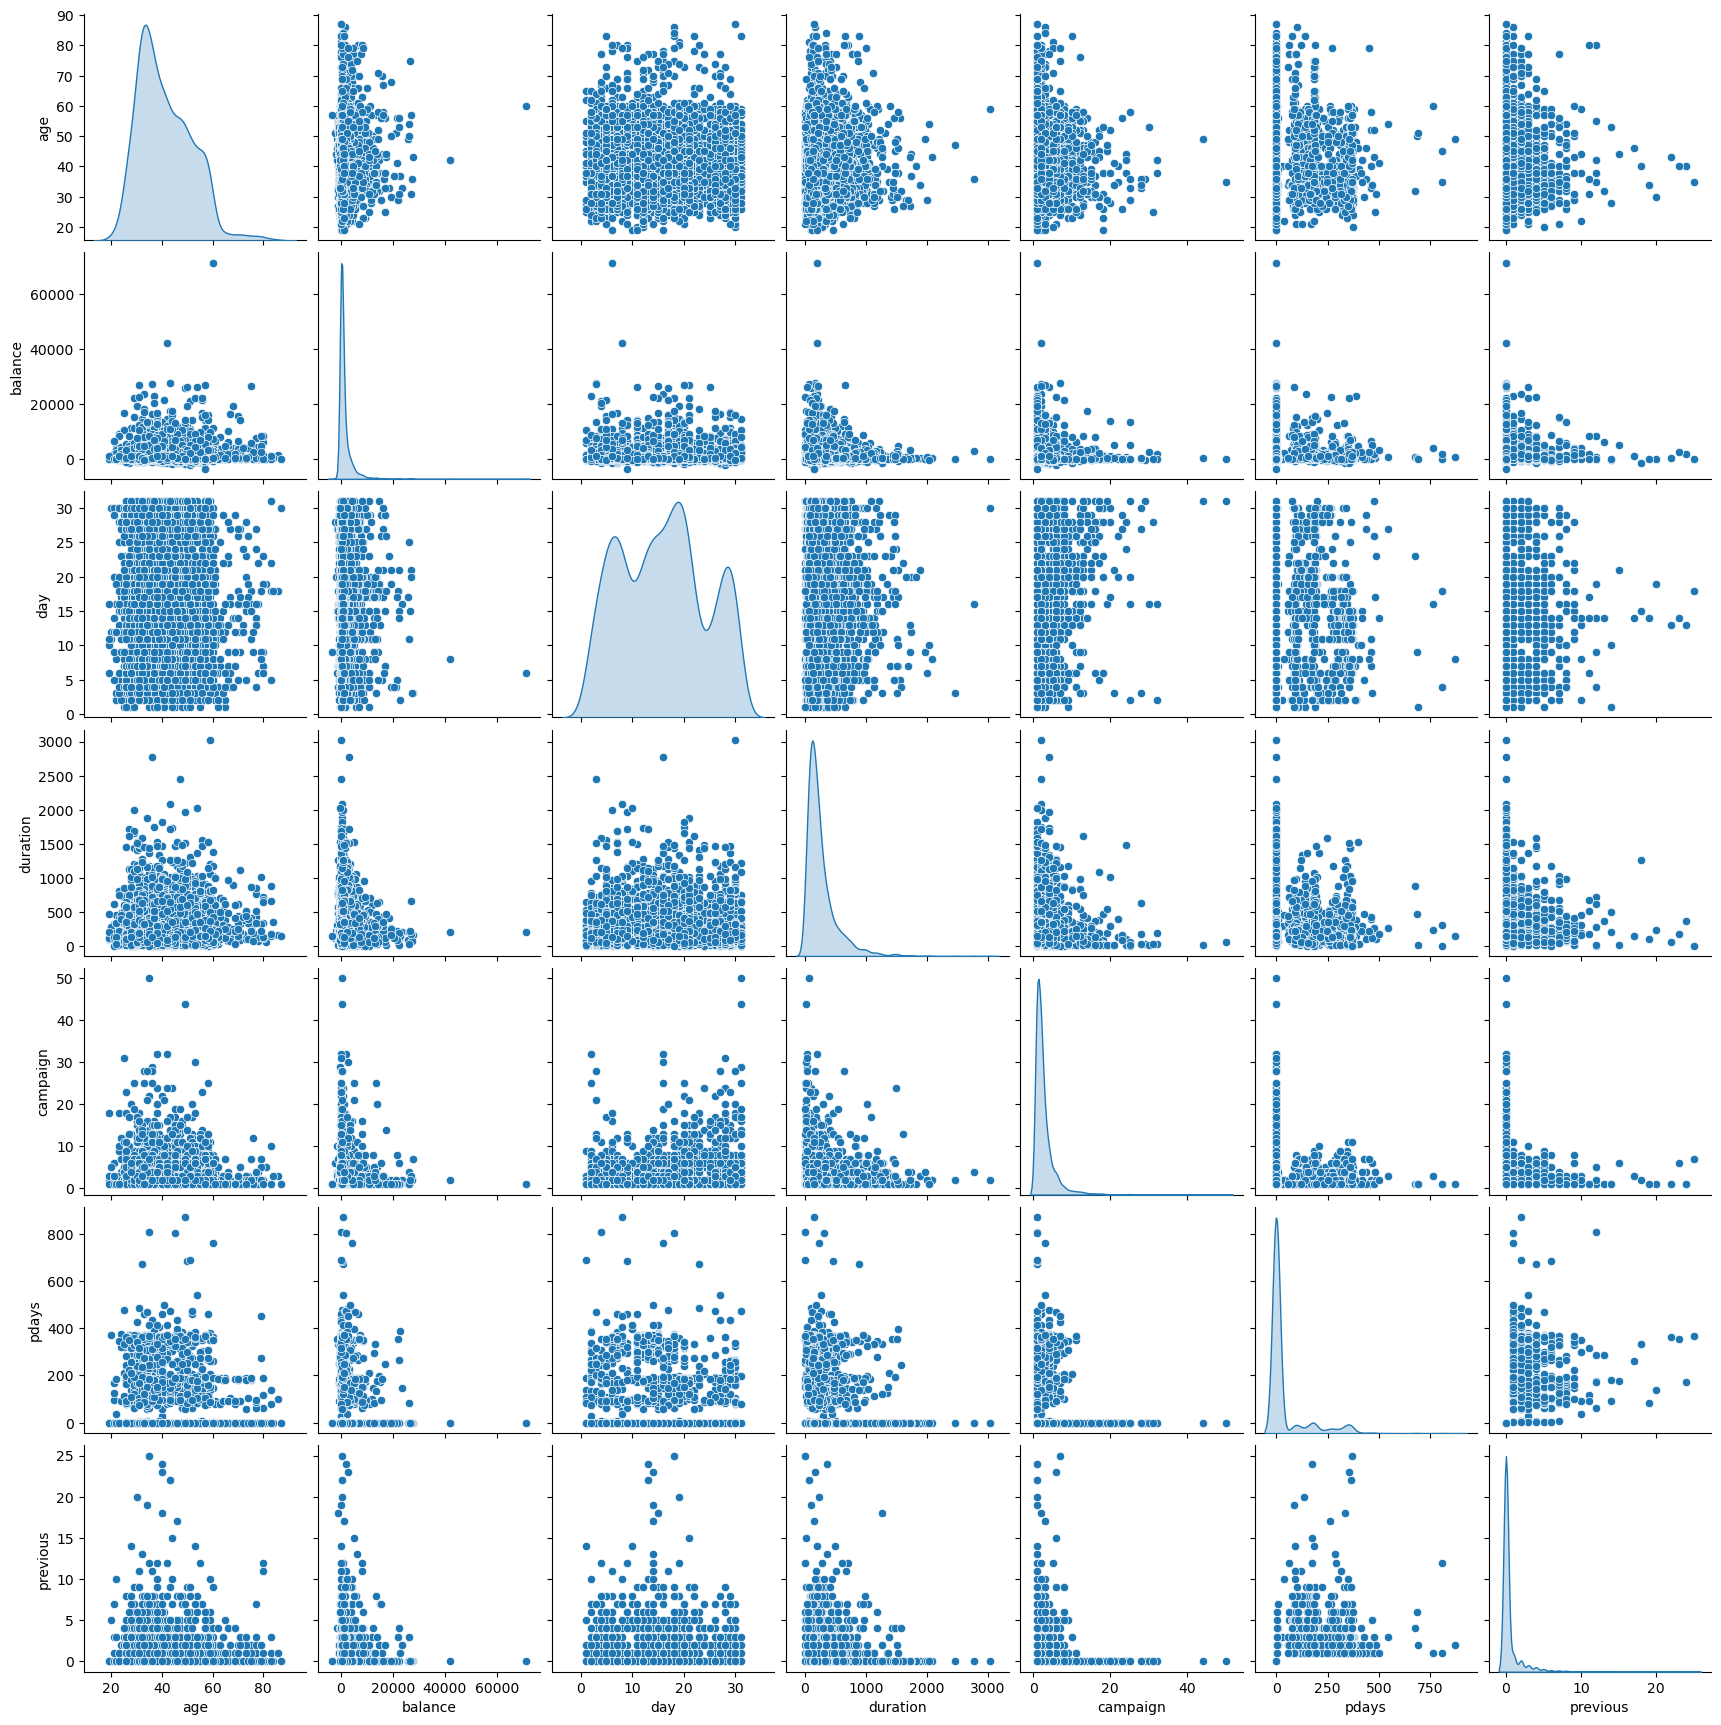

In [38]:
eda_dataset(test)

In [50]:
import warnings
warnings.filterwarnings('ignore')

def visualize_data(df):
    """
    Function to plot visual charts from the input data.
    
    Args:
        df (pd.DataFrame): The data in the form of a DataFrame.
    """
    # 1. Age distribution plot
    plt.figure(figsize=(8, 6))
    sns.histplot(df['age'], kde=True, bins=30, color='blue')
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

    # 2. Job frequency bar plot
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df['job'], order=df['job'].value_counts().index, palette="viridis")
    plt.title("Job Frequency")
    plt.xlabel("Frequency")
    plt.ylabel("Job")
    plt.show()

    # 3. Comparison bar plot of outcome y (yes/no) by marital status
    plt.figure(figsize=(8, 6))
    sns.countplot(x='marital', hue='y', data=df, palette="Set2")
    plt.title("Outcome y by Marital Status")
    plt.xlabel("Marital Status")
    plt.ylabel("Frequency")
    plt.show()

    # 4. Boxplot to check the difference in account balance by job type
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='job', y='balance', data=df, palette="coolwarm")
    plt.title("Account Balance by Job Type")
    plt.xlabel("Job")
    plt.ylabel("Balance")
    plt.xticks(rotation=45)
    plt.show()

    # 5. Heatmap to view correlations between numerical variables
    plt.figure(figsize=(10, 8))
    out_cols = list(set(df.nunique()[df.nunique() < 6].keys().tolist() + df.select_dtypes(include='object').columns.tolist()))
    viz_cols = [x for x in df.columns if x not in out_cols]
    correlation = df[viz_cols].corr()
    sns.heatmap(correlation, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title("Correlation Matrix of Variables")
    plt.show()

    # 6. Contact frequency plot by outcome y (yes/no)
    plt.figure(figsize=(8, 6))
    sns.countplot(x='contact', hue='y', data=df, palette="pastel")
    plt.title("Contact Frequency by Outcome y")
    plt.xlabel("Contact Type")
    plt.ylabel("Frequency")
    plt.show()

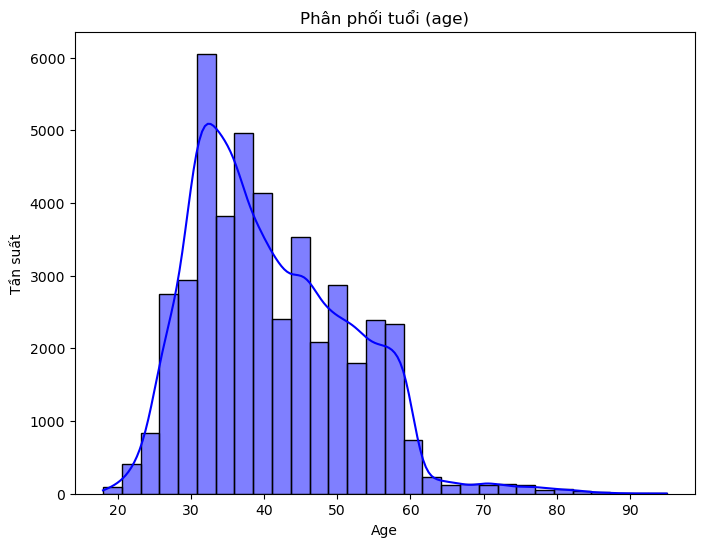

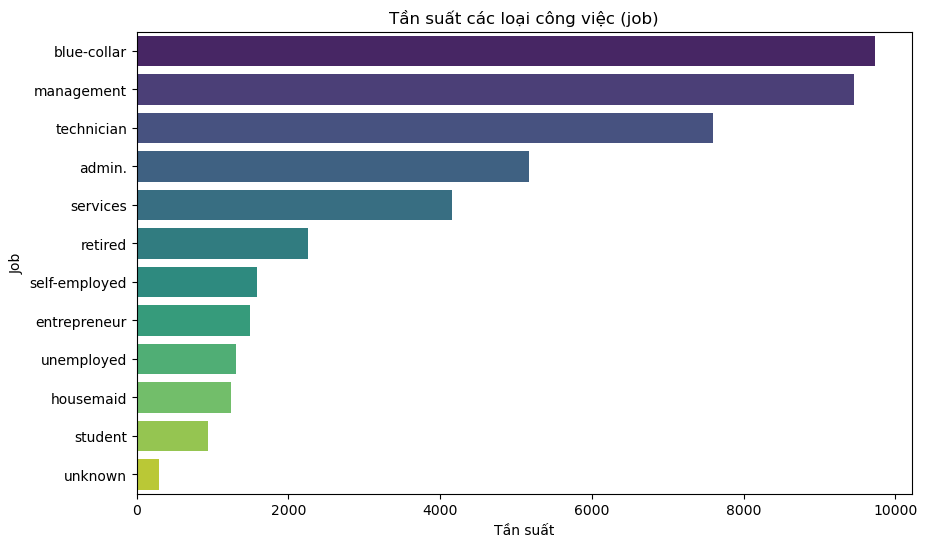

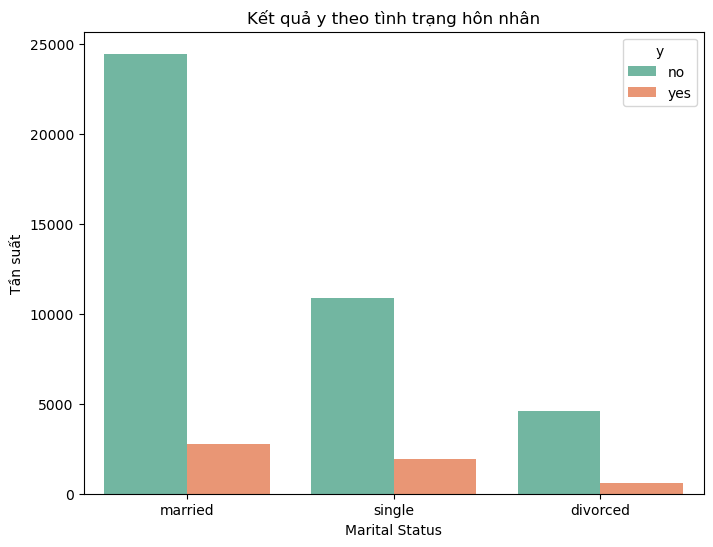

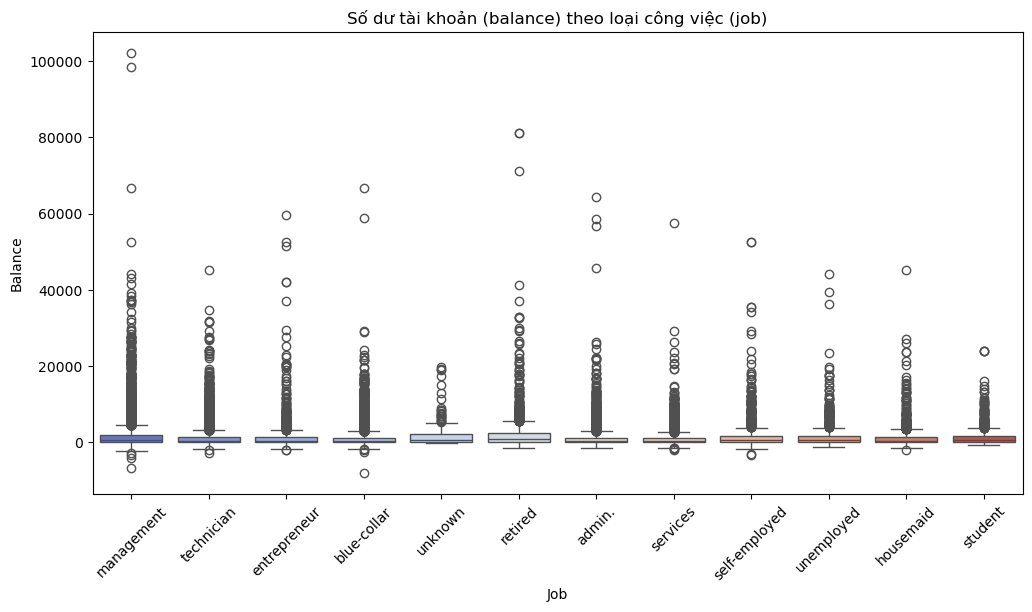

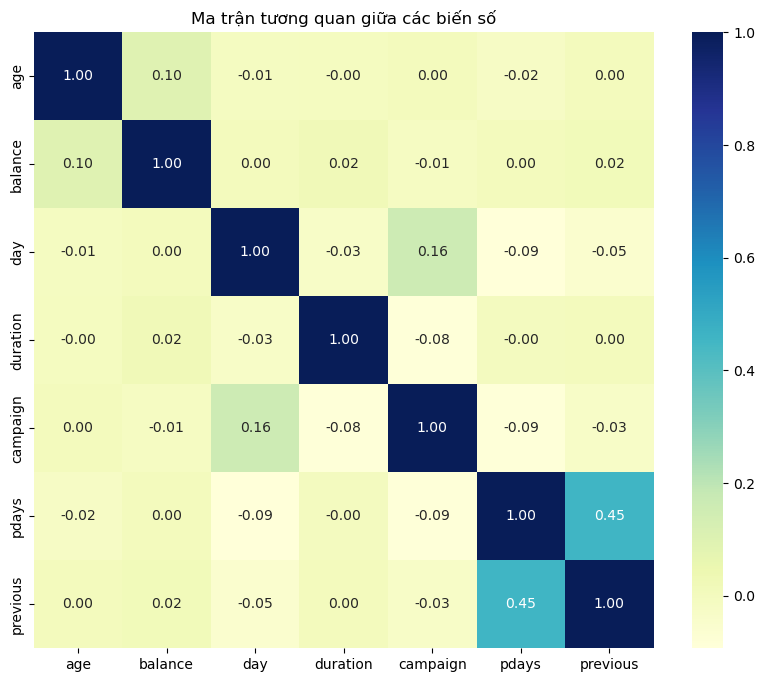

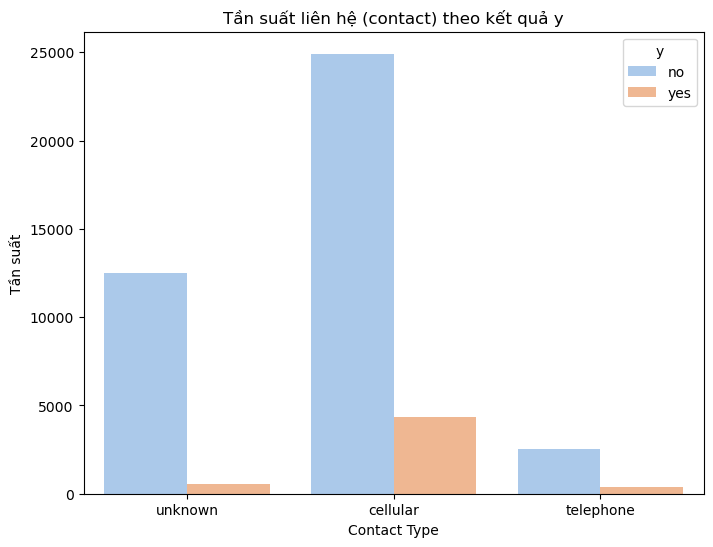

In [52]:
visualize_data(train)

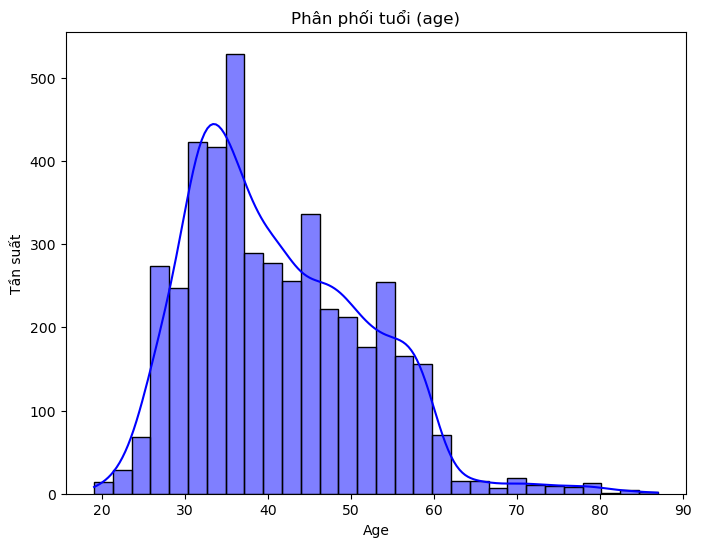

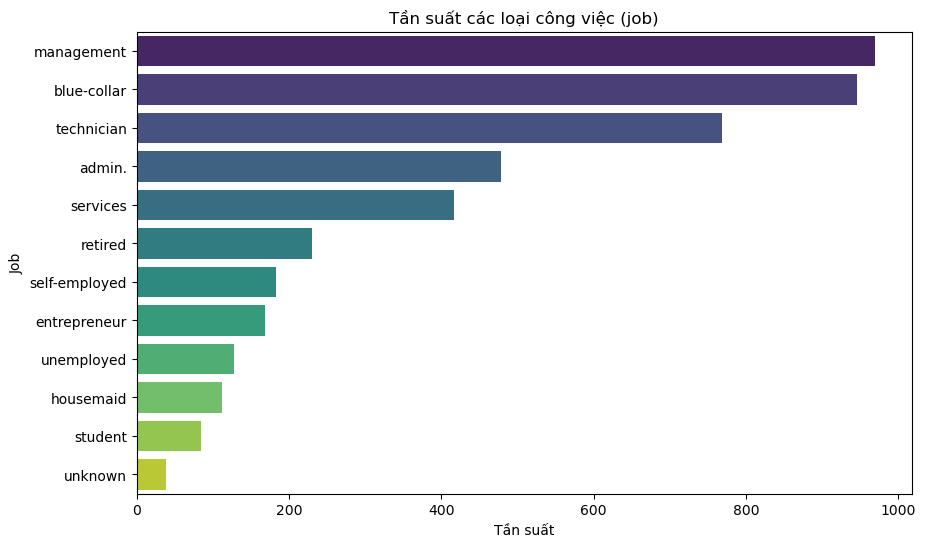

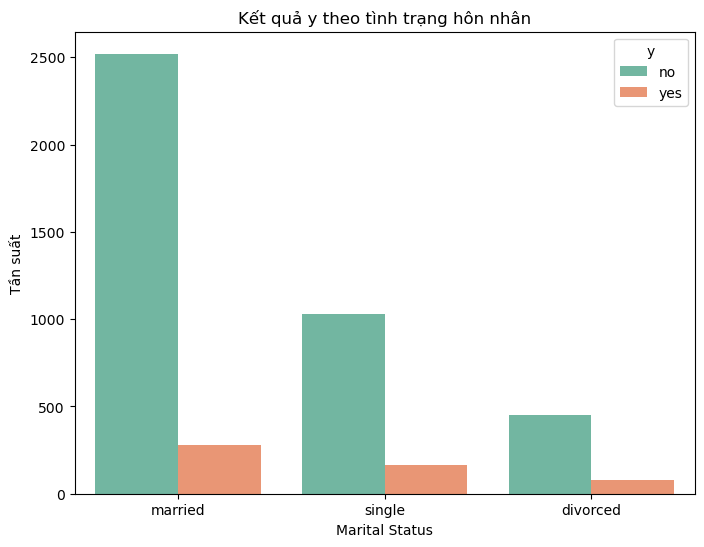

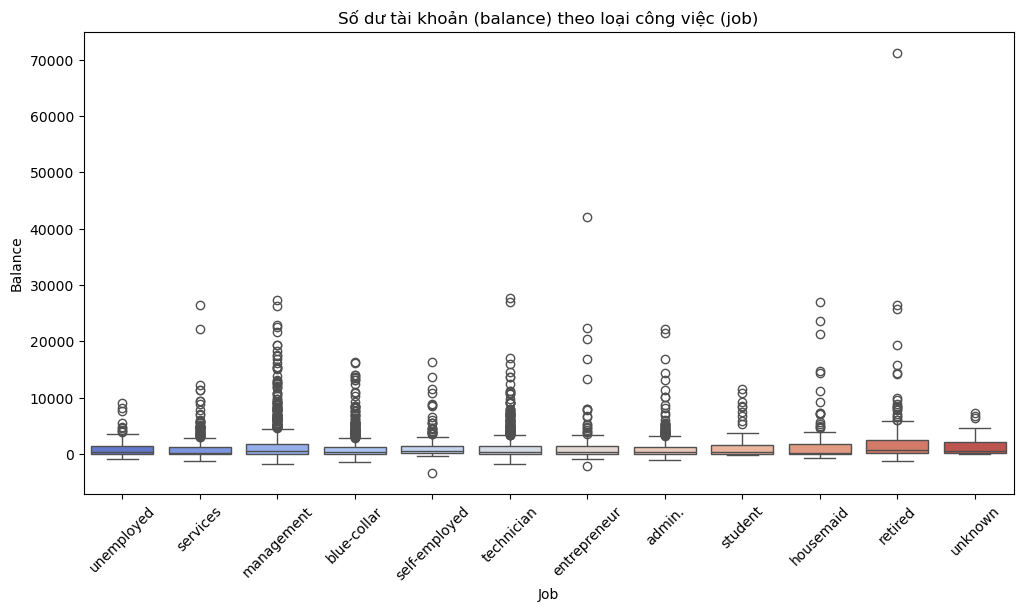

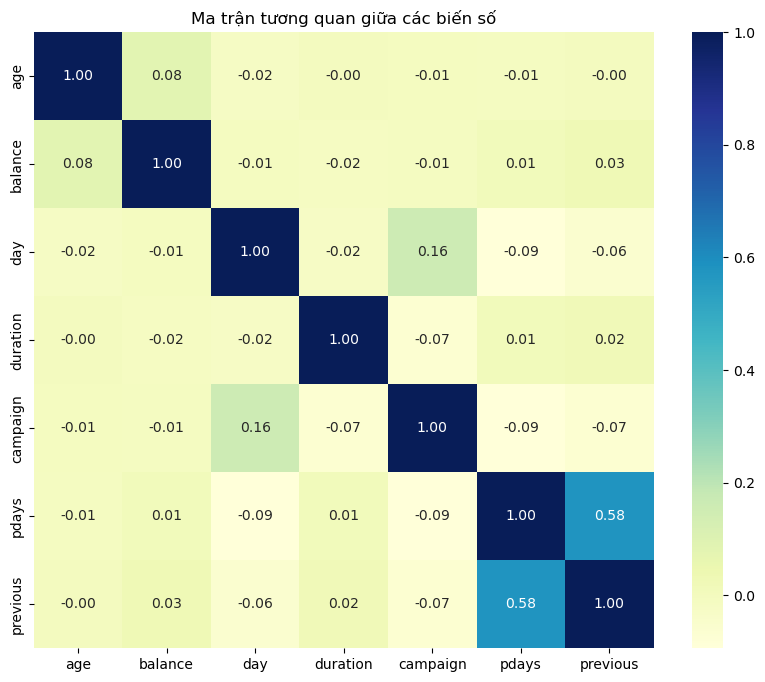

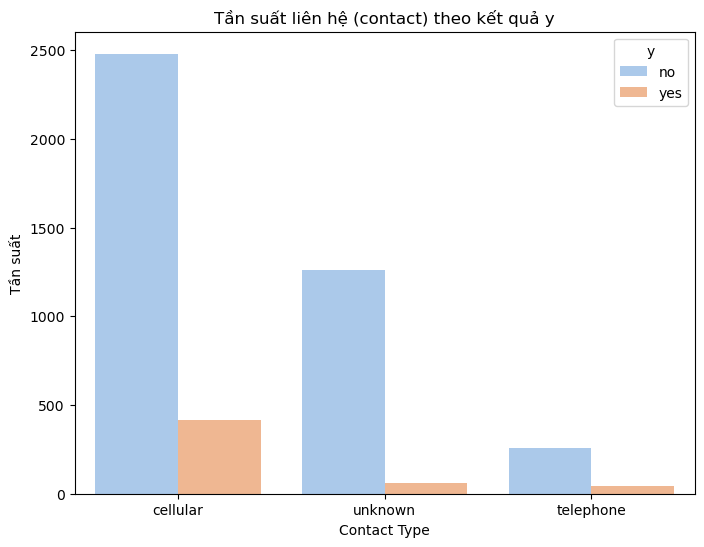

In [54]:
visualize_data(test)